In [1]:
import numpy as np
import pandas as pd
import PythonTools as PT
from matplotlib import pyplot as plt
import collections as CS
import os
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

%matplotlib inline
PT.PlotSettings()

In [2]:
import Dijkstra as DS

# Implementation

In [3]:
List_Nodes=['A','B','C','D','E','F','G','H','I','J','K','L','M','N']

# Option 1: Random Node locations
np.random.seed(69079)
X_Coord=np.random.randint(-500,500,len(List_Nodes))
Y_Coord=np.random.randint(-900,500,len(List_Nodes))

# Random Connection between nodes
Connection=len(List_Nodes)
Index=np.zeros((Connection,2))
Index[:,1]=np.arange(0,Connection,1)
Index[:,0]=np.random.random(Connection)
DF=pd.DataFrame(data=Index,columns=['Random','Index'])
DF.sort_values(by='Random',inplace=True)

Nodes_All=CS.defaultdict(list)
for i, node in enumerate(List_Nodes):
    Nodes_All[node].append(X_Coord[i]) # assign random X coordinate
    Nodes_All[node].append(Y_Coord[i]) # assign random Y coordinates

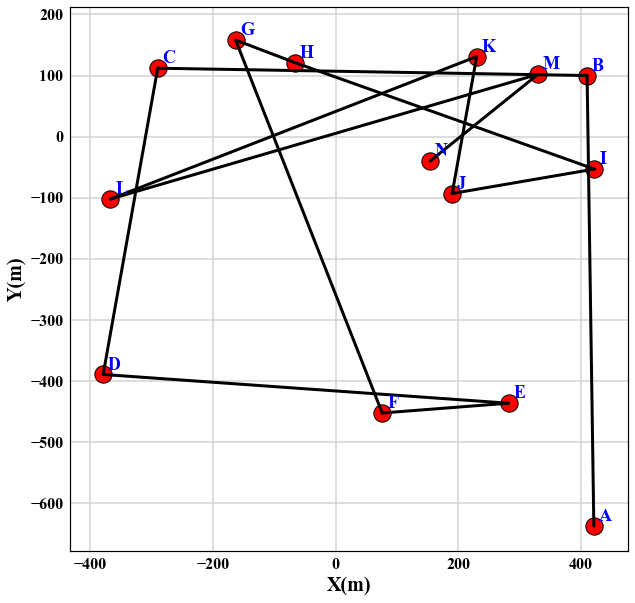

In [4]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

Offset=[8,8]
for i, node in enumerate(Nodes_All):
    ax.scatter(Nodes_All[node][0],Nodes_All[node][1], s=300,c='r',edgecolor='k')
    ax.annotate(node, xy=(Nodes_All[node][0]+Offset[0], Nodes_All[node][1]+Offset[1]),color='b')

for i in range (len(DF)-1):
    One=int(DF['Index'][i])
    Two=int(DF['Index'][i+1])
    ax.plot([Nodes_All[List_Nodes[One]][0],Nodes_All[List_Nodes[Two]][0]],
            [Nodes_All[List_Nodes[One]][1],Nodes_All[List_Nodes[Two]][1]],c='k',lw=3)

ax.grid(axis='both')
ax.set_xlabel('X(m)')
ax.set_ylabel('Y(m)')

## Set Nodes

In [5]:
Test=DS.Dijkstra()
for word in Nodes_All:
    Test.AddNode(word)
Test.Nodes

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N'}

## Set Edges

In [6]:
for i in range (len(DF)-1):
    One=int(DF['Index'][i])
    Two=int(DF['Index'][i+1])
    Dist=np.array([Nodes_All[List_Nodes[One]][0],Nodes_All[List_Nodes[One]][1]])-np.array([Nodes_All[List_Nodes[Two]][0],
                                                                                           Nodes_All[List_Nodes[Two]][1]]) # Euclidean Distance
    Dist=np.linalg.norm(Dist)
    Test.AddEdge(List_Nodes[One],List_Nodes[Two],Dist)

In [7]:
Test.Edges

defaultdict(list,
            {'A': ['B'],
             'B': ['A', 'C'],
             'C': ['B', 'D'],
             'D': ['C', 'E'],
             'E': ['D', 'F'],
             'F': ['E', 'G'],
             'G': ['F', 'H'],
             'H': ['G', 'I'],
             'I': ['H', 'J'],
             'J': ['I', 'K'],
             'K': ['J', 'L'],
             'L': ['K', 'M'],
             'M': ['L', 'N'],
             'N': ['M']})

In [8]:
Test.Distances

{('A', 'B'): 737.08208498104193,
 ('B', 'A'): 737.08208498104193,
 ('B', 'C'): 700.102849587116,
 ('C', 'B'): 700.102849587116,
 ('C', 'D'): 508.84378742399912,
 ('D', 'C'): 508.84378742399912,
 ('D', 'E'): 662.66884640821922,
 ('E', 'D'): 662.66884640821922,
 ('E', 'F'): 206.6204249342257,
 ('F', 'E'): 206.6204249342257,
 ('F', 'G'): 655.14960123623678,
 ('G', 'F'): 655.14960123623678,
 ('G', 'H'): 103.81714694596457,
 ('H', 'G'): 103.81714694596457,
 ('H', 'I'): 518.09265580588965,
 ('I', 'H'): 518.09265580588965,
 ('I', 'J'): 235.42302351299458,
 ('J', 'I'): 235.42302351299458,
 ('J', 'K'): 227.54340245324627,
 ('K', 'J'): 227.54340245324627,
 ('K', 'L'): 640.8572383924519,
 ('L', 'K'): 640.8572383924519,
 ('L', 'M'): 726.24031835199014,
 ('M', 'L'): 726.24031835199014,
 ('M', 'N'): 226.14154859291116,
 ('N', 'M'): 226.14154859291116}

In [9]:
Result,Path,TotalPath=Test.Find_Path('A')

In [10]:
TotalPath

defaultdict(list,
            {'A': ['A'],
             'B': ['B', 'A'],
             'C': ['C', 'B', 'A'],
             'D': ['D', 'C', 'B', 'A'],
             'E': ['E', 'D', 'C', 'B', 'A'],
             'F': ['F', 'E', 'D', 'C', 'B', 'A'],
             'G': ['G', 'F', 'E', 'D', 'C', 'B', 'A'],
             'H': ['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'],
             'I': ['I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'],
             'J': ['J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'],
             'K': ['K', 'J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'],
             'L': ['L', 'K', 'J', 'I', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A'],
             'M': ['M',
              'L',
              'K',
              'J',
              'I',
              'H',
              'G',
              'F',
              'E',
              'D',
              'C',
              'B',
              'A'],
             'N': ['N',
              'M',
              'L',
              'K',
              'J',

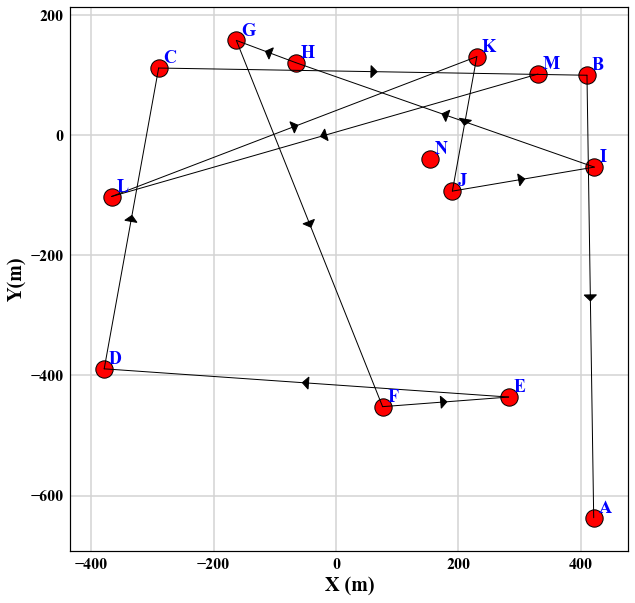

In [24]:
Test.Path_Plot(Nodes_All,Node='M',lw=1)